In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [102]:
data = pd.read_csv('Ecommerce_Delivery_Analytics_New.csv')
data

,Order ID,Customer ID,Platform,Order Date & Time,Delivery Time (Minutes),Product Category,Order Value (INR),Customer Feedback,Service Rating,Delivery Delay,Refund Requested
0,ORD000001,CUST2824,JioMart,19:29.5,30,Fruits & Vegetables,382,"Fast delivery, great service!",5,No,No
1,ORD000002,CUST1409,Blinkit,54:29.5,16,Dairy,279,Quick and reliable!,5,No,No
2,ORD000003,CUST5506,JioMart,21:29.5,25,Beverages,599,Items missing from order.,2,No,Yes
3,ORD000004,CUST5012,JioMart,19:29.5,42,Beverages,946,Items missing from order.,2,Yes,Yes
4,ORD000005,CUST4657,Blinkit,49:29.5,30,Beverages,334,"Fast delivery, great service!",5,No,No
...,...,...,...,...,...,...,...,...,...,...,...
99995,ORD099996,CUST5324,JioMart,49:29.5,24,Dairy,289,Packaging could be better.,3,No,No
99996,ORD099997,CUST1677,JioMart,18:29.5,19,Snacks,322,Good quality products.,4,No,No
99997,ORD099998,CUST8198,JioMart,27:29.5,41,Dairy,135,"Fast delivery, great service!",5,Yes,No
99998,ORD099999,CUST9975,JioMart,14:29.5,31,Grocery,973,Quick and reliable!,5,No,No


In [100]:
data = data.drop_duplicates(inplace = True)

In [103]:
data.shape

(100000, 11)

In [104]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   Order ID                 100000 non-null  object
 1   Customer ID              100000 non-null  object
 2   Platform                 100000 non-null  object
 3   Order Date & Time        100000 non-null  object
 4   Delivery Time (Minutes)  100000 non-null  int64 
 5   Product Category         100000 non-null  object
 6   Order Value (INR)        100000 non-null  int64 
 7   Customer Feedback        100000 non-null  object
 8   Service Rating           100000 non-null  int64 
 9   Delivery Delay           100000 non-null  object
 10  Refund Requested         100000 non-null  object
dtypes: int64(3), object(8)
memory usage: 8.4+ MB


In [159]:
#total sale for each platform
Total_sale  =  data.groupby('Platform')['Order Value (INR)'].sum().reset_index()
Total_sale['Order Value (Million Rs)'] = Total_sale['Order Value (INR)']/1000000
Total_sale

,Platform,Order Value (INR),Order Value (Million Rs)
0,Blinkit,19705084,19.705084
1,JioMart,19562372,19.562372
2,Swiggy Instamart,19831984,19.831984


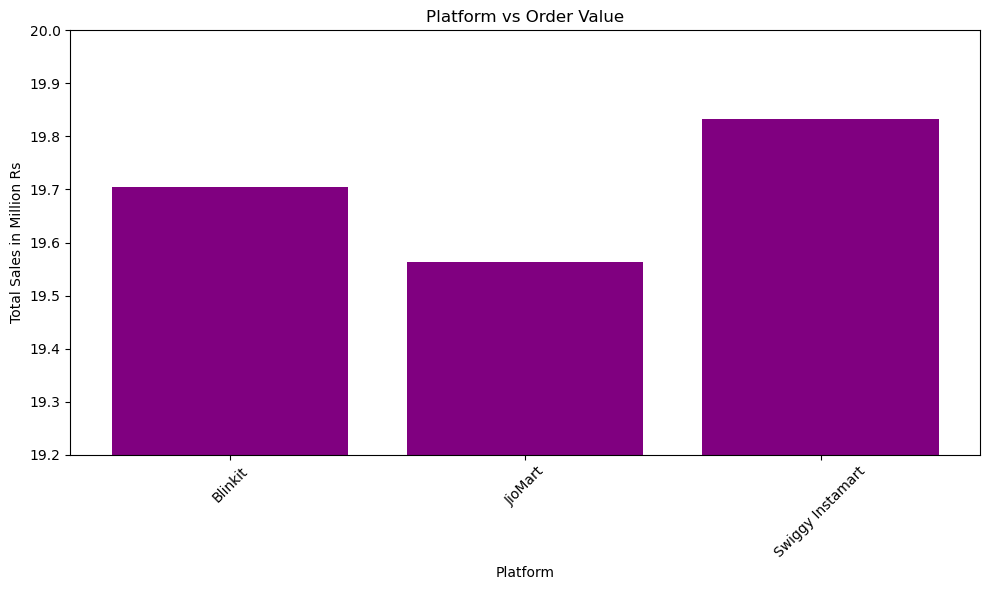

In [258]:

plt.figure(figsize=(10, 6))
plt.title('Platform vs Order Value')
plt.bar(Total_sale['Platform'], Total_sale['Order Value (Million Rs)'], color = 'purple')
plt.xlabel('Platform')
plt.ylabel('Total Sales in Million Rs')
plt.xticks(rotation=45)
plt.tight_layout()
plt.ylim(19.2,20)
plt.show()


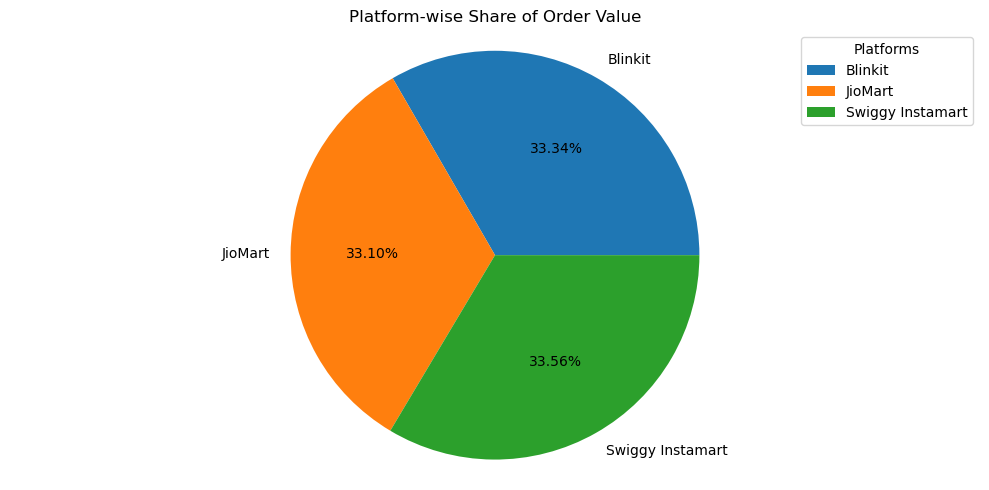

In [261]:
plt.figure(figsize=(10, 5))
plt.pie(
    Total_sale['Order Value (Million Rs)'], 
    labels=Total_sale['Platform'], 
    autopct='%1.2f%%'
)
plt.title('Platform-wise Share of Order Value')
plt.axis('equal')  # Make it a perfect circle
plt.tight_layout()
plt.legend(title = 'Platforms')
plt.show()


In [56]:
# platform with best rating 
best_rating  =  data.groupby('Platform')['Service Rating'].mean().reset_index()
best_rating = best_rating.sort_values(by= 'Service Rating', ascending = False)
best_rating['Service Rating'] = round(best_rating['Service Rating'],2)
best_rating

,Platform,Service Rating
1,JioMart,3.25
2,Swiggy Instamart,3.24
0,Blinkit,3.23


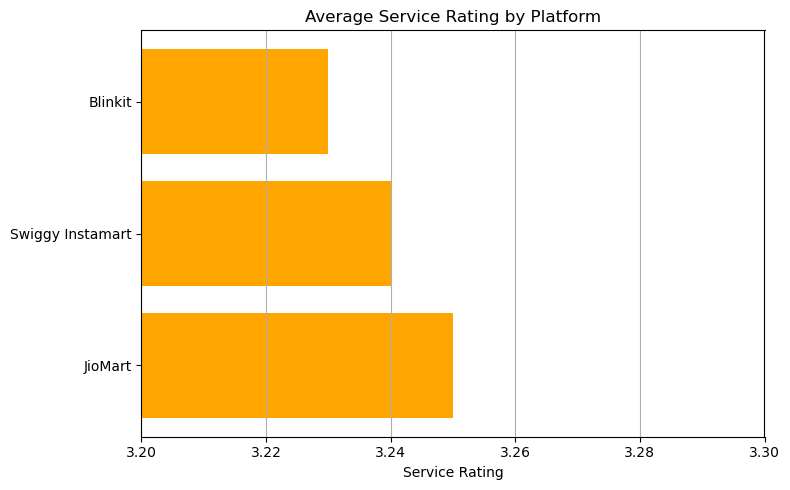

In [225]:
plt.figure(figsize=(8, 5))
plt.barh(best_rating['Platform'], best_rating['Service Rating'], color='orange')
plt.title('Average Service Rating by Platform')
plt.xlabel('Service Rating')
plt.xlim(3.2, 3.3)
plt.grid(axis='x')
plt.tight_layout()
plt.show()


In [226]:
#product with highest sales
products = data.groupby('Product Category')['Order Value (INR)'].sum().reset_index()
products['values in Million INR'] = products['Order Value (INR)']/1000000
products

,Product Category,Order Value (INR),values in Million INR
0,Beverages,9086669,9.086669
1,Dairy,7610522,7.610522
2,Fruits & Vegetables,6246517,6.246517
3,Grocery,14194055,14.194055
4,Personal Care,17395601,17.395601
5,Snacks,4566076,4.566076


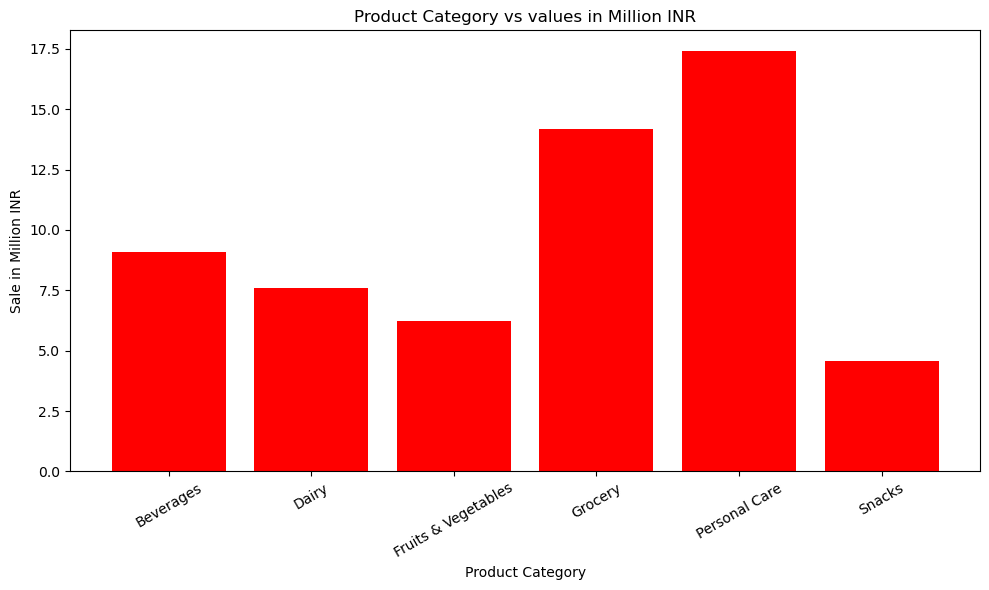

In [228]:
plt.figure(figsize=(10, 6))
plt.title('Product Category vs values in Million INR')
plt.bar(products['Product Category'], products['values in Million INR'], color = 'Red')
plt.xlabel('Product Category')
plt.ylabel('Sale in Million INR')
plt.xticks(rotation= 30)
plt.tight_layout()
plt.show()


In [67]:
pivot_sales = pd.pivot_table(
    data,
    values='Order Value (INR)',
    index='Product Category',
    columns='Platform',
    aggfunc='sum',
    fill_value=0  # Fill missing values with 0
)

# Display the pivot table
print(pivot_sales)

Platform             Blinkit  JioMart  Swiggy Instamart
Product Category                                       
Beverages            3063913  2967101           3055655
Dairy                2547605  2516935           2545982
Fruits & Vegetables  2097912  2075237           2073368
Grocery              4731502  4746467           4716086
Personal Care        5741039  5736371           5918191
Snacks               1523113  1520261           1522702


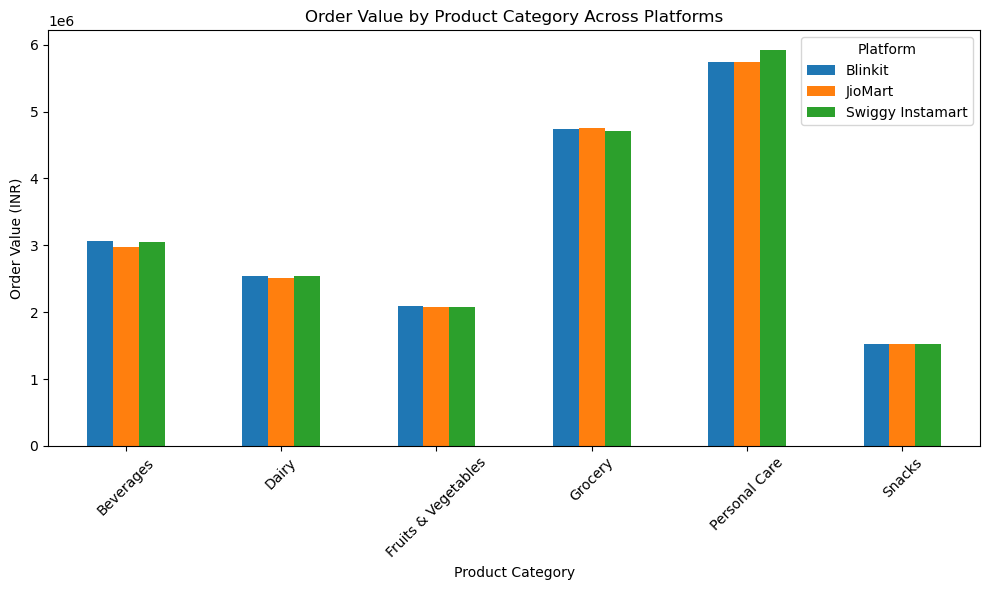

In [232]:
pivot_sales.plot(kind='bar', figsize=(10, 6))

plt.title('Order Value by Product Category Across Platforms')
plt.xlabel('Product Category')
plt.ylabel('Order Value (INR)')
plt.xticks(rotation=45)
plt.legend(title='Platform')
plt.tight_layout()
plt.show()


In [94]:
#average delivary time for each platform
avg_time = data.groupby('Platform')['Delivery Time (Minutes)'].mean().reset_index()
avg_time = avg_time.sort_values(by='Delivery Time (Minutes)').reset_index()
avg_time.drop('index',axis = 1,inplace = True)
avg_time['Delivery Time (Minutes)'] =  round(avg_time['Delivery Time (Minutes)'],2)
avg_time

,Platform,Delivery Time (Minutes)
0,Blinkit,29.47
1,Swiggy Instamart,29.50
2,JioMart,29.63


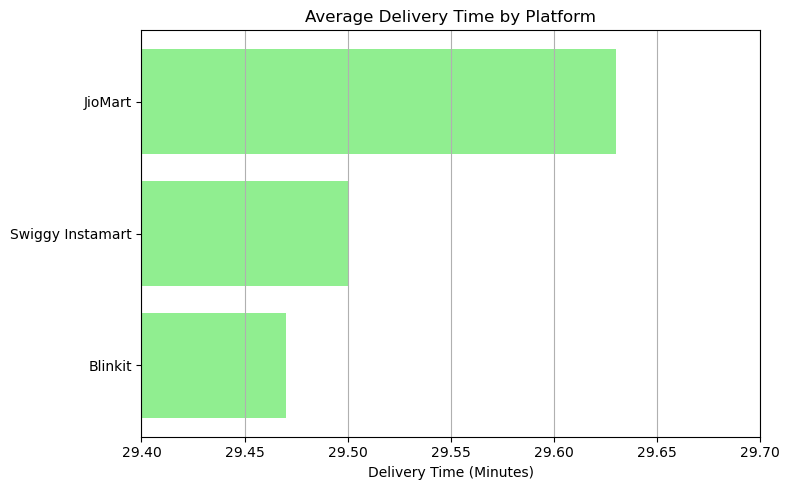

In [234]:
plt.figure(figsize=(8, 5))
plt.barh(avg_time['Platform'], avg_time['Delivery Time (Minutes)'], color='lightgreen')
plt.title('Average Delivery Time by Platform')
plt.xlabel('Delivery Time (Minutes)')
plt.xlim(29.4, 29.7)  # Zoom in to highlight differences
plt.grid(axis='x')
plt.tight_layout()
plt.show()

In [235]:
df = pd.DataFrame(data)
df = df[df['Refund Requested'] == 'Yes']
df

,Order ID,Customer ID,Platform,Order Date & Time,Delivery Time (Minutes),Product Category,Order Value (INR),Customer Feedback,Service Rating,Delivery Delay,Refund Requested
2,ORD000003,CUST5506,JioMart,21:29.5,25,Beverages,599,Items missing from order.,2,No,Yes
3,ORD000004,CUST5012,JioMart,19:29.5,42,Beverages,946,Items missing from order.,2,Yes,Yes
5,ORD000006,CUST3286,Blinkit,36:29.5,25,Personal Care,1939,Items missing from order.,2,No,Yes
7,ORD000008,CUST9935,Swiggy Instamart,50:29.5,16,Personal Care,195,"Horrible experience, never ordering again.",1,No,Yes
9,ORD000010,CUST7912,JioMart,08:29.5,51,Grocery,1279,"Very late delivery, not happy.",2,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...,...
99986,ORD099987,CUST8645,JioMart,44:29.5,49,Beverages,810,"Not fresh, disappointed.",2,Yes,Yes
99987,ORD099988,CUST7027,JioMart,36:29.5,26,Fruits & Vegetables,166,Items missing from order.,2,No,Yes
99988,ORD099989,CUST3412,Swiggy Instamart,39:29.5,38,Dairy,722,Delivery person was rude.,2,No,Yes
99989,ORD099990,CUST8021,JioMart,25:29.5,25,Dairy,675,"Not fresh, disappointed.",2,No,Yes


In [236]:
#platform with high refund requests
new = df.groupby('Platform')['Refund Requested'].count().reset_index()
new = new.sort_values(by = 'Refund Requested',ascending =  False)
new['Refund Requested'] = new['Refund Requested']/1000
new

,Platform,Refund Requested
0,Blinkit,15.353
2,Swiggy Instamart,15.288
1,JioMart,15.178


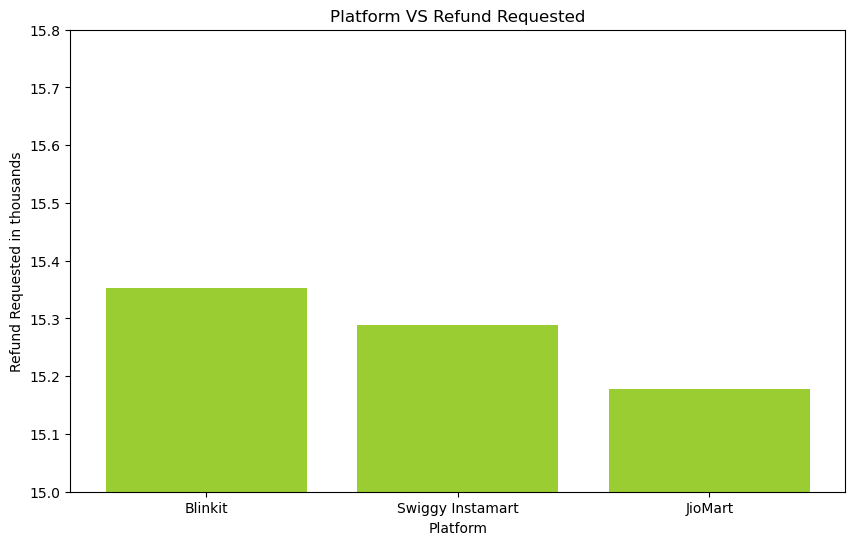

In [264]:
plt.figure(figsize = (10,6))
plt.bar(new['Platform'], new['Refund Requested'], color = 'yellowgreen')
plt.title('Platform VS Refund Requested')
plt.xlabel('Platform')
plt.ylim(15,15.8)
plt.ylabel('Refund Requested in thousands')
plt.show()

In [131]:
#customer with high order value 
cst_high = data.groupby('Customer ID')['Order Value (INR)'].sum().reset_index()
cst_high = cst_high.sort_values(by = 'Order Value (INR)', ascending = False )
cst_high.loc[cst_high['Order Value (INR)'].idxmax()]

Customer ID          CUST9682
Order Value (INR)       16255
Name: 8682, dtype: object

In [146]:
df = pd.DataFrame(data)
df = df[df['Refund Requested'] == 'No']
df = df.reset_index()
df

,index,Order ID,Customer ID,Platform,Order Date & Time,Delivery Time (Minutes),Product Category,Order Value (INR),Customer Feedback,Service Rating,Delivery Delay,Refund Requested
0,0,ORD000001,CUST2824,JioMart,19:29.5,30,Fruits & Vegetables,382,"Fast delivery, great service!",5,No,No
1,1,ORD000002,CUST1409,Blinkit,54:29.5,16,Dairy,279,Quick and reliable!,5,No,No
2,4,ORD000005,CUST4657,Blinkit,49:29.5,30,Beverages,334,"Fast delivery, great service!",5,No,No
3,6,ORD000007,CUST2679,JioMart,22:29.5,22,Personal Care,1693,"Fast delivery, great service!",5,No,No
4,8,ORD000009,CUST2424,JioMart,51:29.5,39,Fruits & Vegetables,182,Very satisfied with the service.,5,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...
54176,99995,ORD099996,CUST5324,JioMart,49:29.5,24,Dairy,289,Packaging could be better.,3,No,No
54177,99996,ORD099997,CUST1677,JioMart,18:29.5,19,Snacks,322,Good quality products.,4,No,No
54178,99997,ORD099998,CUST8198,JioMart,27:29.5,41,Dairy,135,"Fast delivery, great service!",5,Yes,No
54179,99998,ORD099999,CUST9975,JioMart,14:29.5,31,Grocery,973,Quick and reliable!,5,No,No


In [149]:
#platform with low refund requests
new = df.groupby('Platform')['Refund Requested'].count().reset_index()
new = new.sort_values(by = 'Refund Requested')
new.loc[new['Refund Requested'].idxmax()]

Platform            Swiggy Instamart
Refund Requested               18161
Name: 2, dtype: object

In [156]:
#dataframe for sucessful delivary with 5 star rating
new = data[(data['Refund Requested'] == 'No') & (data['Service Rating'] == 5)]
new

,Order ID,Customer ID,Platform,Order Date & Time,Delivery Time (Minutes),Product Category,Order Value (INR),Customer Feedback,Service Rating,Delivery Delay,Refund Requested
0,ORD000001,CUST2824,JioMart,19:29.5,30,Fruits & Vegetables,382,"Fast delivery, great service!",5,No,No
1,ORD000002,CUST1409,Blinkit,54:29.5,16,Dairy,279,Quick and reliable!,5,No,No
4,ORD000005,CUST4657,Blinkit,49:29.5,30,Beverages,334,"Fast delivery, great service!",5,No,No
6,ORD000007,CUST2679,JioMart,22:29.5,22,Personal Care,1693,"Fast delivery, great service!",5,No,No
8,ORD000009,CUST2424,JioMart,51:29.5,39,Fruits & Vegetables,182,Very satisfied with the service.,5,No,No
...,...,...,...,...,...,...,...,...,...,...,...
99990,ORD099991,CUST3013,Blinkit,51:29.5,24,Fruits & Vegetables,491,Excellent experience!,5,No,No
99991,ORD099992,CUST3543,JioMart,10:29.5,25,Dairy,532,Quick and reliable!,5,No,No
99993,ORD099994,CUST5305,JioMart,34:29.5,48,Snacks,357,"Easy to order, loved it!",5,Yes,No
99997,ORD099998,CUST8198,JioMart,27:29.5,41,Dairy,135,"Fast delivery, great service!",5,Yes,No
